In [3]:
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Redford\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [10]:
from scipy.io import wavfile

In [20]:
def denoise_wav(input_file, noise_threshold=0.005):
    # Read the .wav file
    sample_rate, samples = wavfile.read(input_file)

    # If the audio has multiple channels, consider only the first channel
    if len(samples.shape) > 1:
        samples = samples[:, 0]

    # Visualize the original waveform
    plot_waveform(samples, 'Original Waveform')

    # Find noise indices based on the threshold
    noise_indices = np.where(np.abs(samples) < noise_threshold)[0]

    # Remove noise by setting values at noise indices to 0
    samples[noise_indices] = 0

    # Visualize the denoised waveform
    plot_waveform(samples, 'Denoised Waveform')

    return samples


In [7]:
def plot_waveform(waveform, title="Waveform"):
    plt.plot(waveform)
    plt.title(title)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()

def visualize_wav(file_path):
    # Read the .wav file
    sample_rate, samples = wavfile.read(file_path)

    # If the audio has multiple channels, consider only the first channel
    if len(samples.shape) > 1:
        samples = samples[:, 0]

    # Plot the waveform
    plot_waveform(samples, title="Original Waveform")

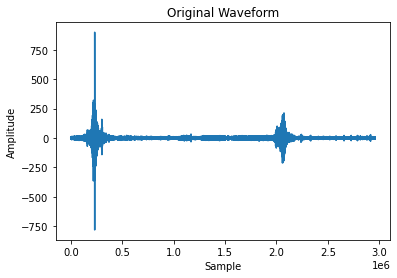

In [11]:
data_dir = './Sample Sig Files/'
wav_path = data_dir + 'Node124-Ch1-7-2023_04_10_14_15_00-9866Hz.wav'

visualize_wav(wav_path)

In [16]:
sample_rate, samples = wavfile.read(wav_path)

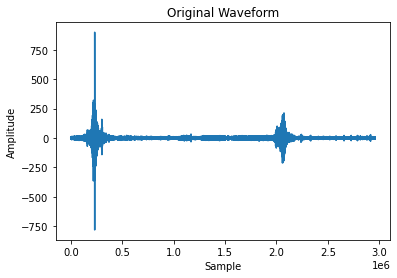

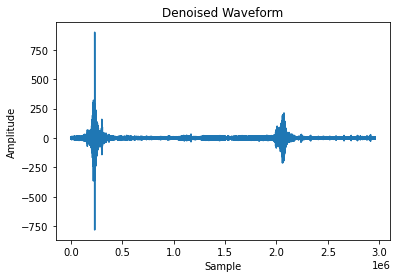

In [21]:


denoised = denoise_wav(wav_path)

# visualize_wav(denoised)